# Amazon Bestselling Books EDA + Plotly Visualizations

![](https://storage.googleapis.com/kaggle-datasets-images/918976/1556647/ec28fd79af9841a579728f5c298f12a3/dataset-cover.jpg?t=2020-10-13-14-50-42)

In that work, exploratory data analysis has been carried out dataset Amazon's Top 50 bestselling books from 2009 to 2019.

FEATURES:

* Name - Name of the Book
* Author - The author of the Book
* User Rating - Amazon User Rating
* Reviews - Number of written reviews on amazon
* Price - The price of the book (As at 13/10/2020)
* Year - The Year(s) it ranked on the bestseller
* Genre - Whether fiction or non-fiction

In [13]:
# Data Processing
import numpy as np
import pandas as pd

# Basic Visualization tools
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set_palette('husl')

plt.rc('figure',figsize=(17,13))
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

import missingno as msno # check missing value
import networkx as nx

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

import cufflinks as cf #importing plotly and cufflinks in offline mode  
import plotly.offline  
cf.go_offline()  
cf.set_config_file(offline=False, world_readable=True)
'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

# IMPORTING DATASET

In [4]:
data = pd.read_csv('bestsellers with categories.csv')
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [6]:
data.describe(include='O') #categorical

,Name,Author,Genre
count,550,550,550
unique,351,248,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,12,310


In [7]:
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

# BESTSELLERS' RATINGS COUNT

In [15]:
temp_df = data['User Rating'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['User Rating'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'RATINGS COUNT' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

def pie_plot(cnt_srs, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.2,
                   showlegend=True,
                   marker=dict(colors=plt.cm.viridis_r(np.linspace(0, 1, 14)),
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

bold("**MOST OF THE RATINGS ARE IN THE RANGE OF 4.6 TO 4.8**")
py.iplot([pie_plot(data['User Rating'].value_counts(), 'Rating')])

**MOST OF THE RATINGS ARE IN THE RANGE OF 4.6 TO 4.8**

# Relationship between Price and User Rating

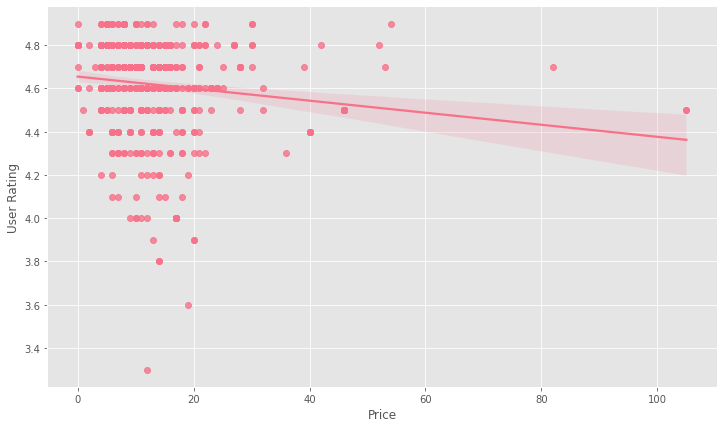

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.regplot(data=data, x='Price', y='User Rating', ax=ax)
plt.show()

* The User Ratings tend to show a slight negative correlation with Price of the Bestselling Book.
* Most of the books are in the 'Less than 50" price range ,so not much conclusion can be drawn.

# Relationship between Price and Reviews

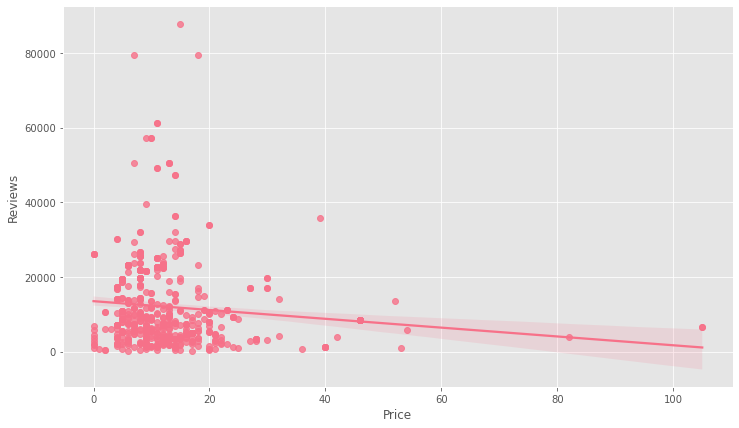

In [17]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.regplot(data=data, x='Price', y='Reviews', ax=ax)
plt.show()

* Reviews and Price also tend to show an almost similar correlation as User Rating and Price.But again as most of the Bestsellers are crowded in a lower Price range,we can't conclude much.

# FICTION AND NON-FICTION BESTSELLERS

In [19]:
temp_df = data['Genre'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['Genre'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark", xaxis = dict(title = 'Genre'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

'''A Function To Plot Pie Plot using Plotly'''

def pie_plot(cnt_srs, colors, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.2,
                   showlegend=True,
                   marker=dict(colors=colors,
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

bold("**NON-FICTION BESTSELLERS ARE MORE THAN FICTION**")
py.iplot([pie_plot(data['Genre'].value_counts(), ['magenta', 'cyan'], 'GENRE')])

**NON-FICTION BESTSELLERS ARE MORE THAN FICTION**

The number of bestselling books' count is constant ,i.e. 50 for all the years.Their distribution with Genre can be seen the above plots.

In [20]:
temp_df1 = data['Year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['Year'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'BESTSELLERS COUNT OVER THE YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()
d1 = data[data["Genre"] == "Fiction"]
d2 = data[data["Genre"] == "Non Fiction"]

col ="Year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(
                    x=vc1[col], 
                    y=vc1["count"], 
                    name="Fiction", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=vc2[col], 
                    y=vc2["count"], 
                    name="Non Fiction", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'GENRE BASED BESTSELLERS COUNT OVER THE YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show()

In [22]:
df1 = data[data["Genre"] == "Fiction"]
df2 = data[data["Genre"] == "Non Fiction"]

temp_df1 = df1['User Rating'].value_counts().reset_index()
temp_df2 = df2['User Rating'].value_counts().reset_index()

# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['User Rating'],
                name="Fiction",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['User Rating'],
                name = "Non Fiction",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))

layout = go.Layout(template= "plotly_dark",title = 'RATING BY GENRE' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

* For ratings less than 4.8,Non-Fiction books count overpowers Fiction books. But the reverse can be seen for the ratings-4.8 and 4.9.This is an important point as ,earlier we have seen that non-fiction books have an overall higher count in the entire dataset.

In [23]:
common_books=data['Name'].value_counts()[:7].rename_axis('Common Books').reset_index(name='count')
fig = px.treemap(common_books, path=['Common Books'], values='count',title='TOP 7 MULTIPLE TIMES BESTSELLERS')

fig.show()

In [24]:
books=data['Name'].value_counts()[data['Name'].value_counts()>5].index
for i in list(books):
    display(data[data['Name']==i])

,Name,Author,User Rating,Reviews,Price,Year,Genre
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction
272,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction
273,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction
274,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2012,Non Fiction
275,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2013,Non Fiction
276,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2014,Non Fiction
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction
278,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2016,Non Fiction
279,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2017,Non Fiction
280,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2018,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
304,StrengthsFinder 2.0,Gallup,4.0,5069,17,2009,Non Fiction
305,StrengthsFinder 2.0,Gallup,4.0,5069,17,2010,Non Fiction
306,StrengthsFinder 2.0,Gallup,4.0,5069,17,2011,Non Fiction
307,StrengthsFinder 2.0,Gallup,4.0,5069,17,2012,Non Fiction
308,StrengthsFinder 2.0,Gallup,4.0,5069,17,2013,Non Fiction
309,StrengthsFinder 2.0,Gallup,4.0,5069,17,2014,Non Fiction
310,StrengthsFinder 2.0,Gallup,4.0,5069,17,2015,Non Fiction
311,StrengthsFinder 2.0,Gallup,4.0,5069,17,2016,Non Fiction
312,StrengthsFinder 2.0,Gallup,4.0,5069,17,2017,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction
250,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2017,Fiction
251,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2018,Fiction
252,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2019,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction
477,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2014,Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
479,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2016,Fiction
480,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2017,Fiction
481,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2018,Fiction
482,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2019,Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
331,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2009,Non Fiction
332,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2011,Non Fiction
333,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2012,Non Fiction
334,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,2013,Non Fiction
335,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2015,Non Fiction
336,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2016,Non Fiction
337,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2017,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
375,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2013,Non Fiction
376,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2015,Non Fiction
377,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2016,Non Fiction
378,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2017,Non Fiction
379,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2018,Non Fiction
380,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2019,Non Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
188,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2012,Non Fiction
189,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2013,Non Fiction
190,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2014,Non Fiction
191,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2015,Non Fiction
192,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2016,Non Fiction


# REVIEWS,RATINGS AND PRICE OF BESTSELLERS

In [25]:
temp_df1 = data.groupby('Year').mean().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['Year'],
                y = temp_df1['Reviews'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

layout = go.Layout(template= "plotly_dark",title = 'AVERAGE REVIEWS OVER THE YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Reviews'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()
temp_df1 = data.groupby('Year').mean().reset_index()

# create trace1
trace1 = go.Bar(
                x = temp_df1['Year'],
                y = temp_df1['Price'],
                marker = dict(color = 'rgb(148, 103, 189)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'AVERAGE PRICE OVER THE YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Price'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()
temp_df1 = data.groupby('Year').mean().reset_index()

# create trace1
trace1 = go.Bar(
                x = temp_df1['Year'],
                y = temp_df1['User Rating'],
                marker = dict(color = 'rgb(250,13,92)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'AVERAGE RATING OVER THE YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Rating'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

# GENRE-BASED REVIEWS,RATINGS AND PRICE OF BESTSELLERS

In [26]:
df1 = data[data["Genre"] == "Fiction"]
df2 = data[data["Genre"] == "Non Fiction"]

temp_df1 = df1.groupby('Year').mean().reset_index()
temp_df2 = df2.groupby('Year').mean().reset_index()

# create trace1
trace1 = go.Bar(
                x = temp_df1['Year'],
                y = temp_df1['User Rating'],
                name="Fiction",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

# create trace2 
trace2 = go.Bar(
                x = temp_df2['Year'],
                y = temp_df2['User Rating'],
                name = "Non Fiction",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))

layout = go.Layout(template= "plotly_dark",title = 'AVERAGE RATING BY GENRE OVER YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Rating'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()
# create trace1
trace1 = go.Bar(
                x = temp_df1['Year'],
                y = temp_df1['Reviews'],
                name="Fiction",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Bar(
                x = temp_df2['Year'],
                y = temp_df2['Reviews'],
                name = "Non Fiction",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))

layout = go.Layout(template= "plotly_dark",title = 'AVERAGE REVIEWS BY GENRE OVER YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Reviews'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()
# create trace1
trace1 = go.Bar(
                x = temp_df1['Year'],
                y = temp_df1['Price'],
                name="Fiction",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['Year'],
                y = temp_df2['Price'],
                name = "Non Fiction",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))

layout = go.Layout(template= "plotly_dark",title = 'AVERAGE PRICE BY GENRE OVER YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Price'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

# BESTSELLING BOOKS' AUTHOR

In [27]:
temp_df1 = data.groupby('Author').count().reset_index().sort_values('Name',ascending=False).head(10)


# create trace1
trace1 = go.Bar(
                x = temp_df1['Author'],
                y = temp_df1['Name'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 10 AUTHORS WITH MOST BESTSELLERS ' , xaxis = dict(title = 'Author',tickangle=45), yaxis = dict(title = 'COUNT'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [28]:
temp_df1 = data.groupby('Author').mean().reset_index().sort_values('Price',ascending=False).head(10)


# create trace1
trace1 = go.Bar(
                x = temp_df1['Author'],
                y = temp_df1['Price'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 10 AUTHORS WITH HIGHEST PRICED BESTSELLERS ' , xaxis = dict(title = 'Author'), yaxis = dict(title = 'Average Price'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()
temp_df1 = data.groupby('Author').mean().reset_index().sort_values('User Rating',ascending=False).head(20)

# create trace1
trace1 = go.Bar(
                x = temp_df1['Author'],
                y = temp_df1['User Rating'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 20 AUTHORS OF BESTSELLERS WITH HIGHEST AVERAGE RATING ' , xaxis = dict(title = 'Author',tickangle=45), yaxis = dict(title = 'Average Rating'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()
temp_df1 = data.groupby('Author').mean().reset_index().sort_values('Reviews',ascending=False).head(20)

# create trace1
trace1 = go.Bar(
                x = temp_df1['Author'],
                y = temp_df1['Reviews'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 10 AUTHORS OF BESTSELLERS WITH HIGHEST AVERAGE REVIEWS ' , xaxis = dict(title = 'Author',tickangle=45), yaxis = dict(title = 'Average Reviews'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

# AUTHORS WITH BESTSELLERS IN BOTH THE GENRES:FICTION AND NON-FICTION

In [29]:
data[data['Author'].isin(list(data.groupby(['Author','Genre']).count().reset_index()['Author'].value_counts()[:2].index))]

,Name,Author,User Rating,Reviews,Price,Year,Genre
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
158,Harry Potter Coloring Book,Scholastic,4.7,3564,9,2015,Non Fiction
268,Pokémon Deluxe Essential Handbook: The Need-to...,Scholastic,4.7,3503,9,2016,Fiction
514,Ultimate Sticker Book: Frozen: More Than 60 Re...,DK,4.5,2586,5,2014,Fiction


# INTERACTIVE PLOTLY SCATTERPLOTS

#VISUALIZING AVG. REVIEWS-AVG. RATINGS RELATIONSHIP OF TOP 10 AUTHORS WITH HIGHEST AVG. REVIEWS:

In [33]:
df1 = data.groupby('Author').mean().sort_values('Reviews',ascending=False).reset_index().head(10)

fig = px.scatter(df1, x='User Rating', y='Reviews', color='Author')

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

#VISUALIZING AVG. PRICE-AVG. RATINGS RELATIONSHIP OF TOP 10 AUTHORS WITH HIGHEST AVG. PRICED BESTSELLERS

In [34]:
df1 = data.groupby('Author').mean().sort_values('Price',ascending=False).reset_index().head(10)

fig = px.scatter(df1, x='User Rating', y='Price', color='Author')

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

# YEAR BASED ANALYSIS OF REVIEWS,RATINGS AND PRICE OF BESTSELLERS

In [35]:
df1 = data[data["Genre"] == "Fiction"]
df2 = data[data["Genre"] == "Non Fiction"]

temp_df1 = df1.groupby('Year').mean().reset_index()
temp_df2 = df2.groupby('Year').mean().reset_index()

trace1 = go.Scatter(
                    x=temp_df1['Year'], 
                    y=temp_df1['Price'], 
                    name="Fiction", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=temp_df2['Year'], 
                    y=temp_df2['Price'], 
                    name="Non Fiction", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Average Price over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Price'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show()

trace1 = go.Scatter(
                    x=temp_df1['Year'], 
                    y=temp_df1['User Rating'], 
                    name="Fiction", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=temp_df2['Year'], 
                    y=temp_df2['User Rating'], 
                    name="Non Fiction", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))

layout = go.Layout(hovermode= 'closest', title = 'Average Rating over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Rating'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show()

trace1 = go.Scatter(
                    x=temp_df1['Year'], 
                    y=temp_df1['Reviews'], 
                    name="Fiction", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=temp_df2['Year'], 
                    y=temp_df2['Reviews'], 
                    name="Non Fiction", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))

layout = go.Layout(hovermode= 'closest', title = 'Average Reviews over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Reviews'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show()

In [36]:
!pip install bubbly


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5429 sha256=91046edd6613442088ecb8d833491acdd9fd8a80a733ecd8a3a1027d06558f83
  Stored in directory: c:\users\alanj\appdata\local\pip\cache\wheels\b5\4a\53\7234ca75eea014cea6a7093adc822c77b40ba13de20c6f5d0a
Successfully built bubbly


# BUBBLEPLOTS FOR YEAR BASED INTERACTIVE VISUALS

In [37]:
from bubbly.bubbly import bubbleplot 
df1 = data.groupby(['Genre','Year']).mean().reset_index()
figure = bubbleplot(dataset=df1, x_column='User Rating', y_column='Reviews', 
    bubble_column='Genre', time_column='Year', color_column='Genre', 
    x_title="Avg User Rating", y_title="Avg Reviews", title='Bestsellers Amazon',
    x_logscale=True, scale_bubble=3, height=650)

iplot(figure)

In [38]:
from bubbly.bubbly import bubbleplot 
df1 = data.groupby(['Genre','Year']).mean().reset_index()
figure = bubbleplot(dataset=df1, x_column='User Rating', y_column='Price', 
    bubble_column='Genre', time_column='Year', color_column='Genre', 
    x_title="User Rating", y_title="Avg Price", title='Bestsellers Amazon',
    x_logscale=True, scale_bubble=3, height=650)

iplot(figure)

# BESTSELLING BOOKS

In [39]:
temp_df1 = data.groupby('Name').mean().reset_index().sort_values('Price',ascending=False).head(10)


# create trace1
trace1 = go.Bar(
                x = temp_df1['Name'],
                y = temp_df1['Price'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 10 HIGHEST PRICED BESTSELLERS ' , xaxis = dict(title = 'Book',tickangle=45), yaxis = dict(title = 'Average Price'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

# create trace1
trace1 = go.Bar(
                x = temp_df1['Name'],
                y = temp_df1['Reviews'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 10 BESTSELLERS WITH HIGHEST AVERAGE REVIEWS ' , xaxis = dict(title = 'Book',tickangle=45), yaxis = dict(title = 'Average Reviews'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

# THE LATEST YEAR -2019 ANALYZED

In [42]:
df1=data[data['Year']==2019]

'''A Function To Plot Pie Plot using Plotly'''

def pie_plot(cnt_srs, colors, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.2,
                   showlegend=True,
                   marker=dict(colors=colors,
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

bold("**2019 Bestsellers are Non-Fiction Majorly**")
py.iplot([pie_plot(df1['Genre'].value_counts(), ['magenta', 'cyan'], 'GENRE')])


**2019 Bestsellers are Non-Fiction Majorly**

In [43]:
temp_df1=data[data['Year']==2019].groupby('Author').count().reset_index().sort_values('Name',ascending=False).head(3)
trace1 = go.Bar(
                x = temp_df1['Author'],
                y = temp_df1['Name'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 3 AUTHORS WITH HIGHEST BESTSELLERS IN 2019 ' , xaxis = dict(title = 'Author'), yaxis = dict(title = 'COUNT'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

temp_df1=data[data['Year']==2019].groupby('User Rating').count().reset_index().sort_values('Name',ascending=False)
trace1 = go.Bar(
                x = temp_df1['User Rating'],
                y = temp_df1['Name'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'Ratings In 2019 ' , xaxis = dict(title = 'Ratings'), yaxis = dict(title = 'COUNT'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [46]:
temp_df1=data[data['Year']==2019].groupby('Author').mean().reset_index().sort_values('User Rating',ascending=False).head(10)
trace1 = go.Bar( x = temp_df1['Author'],
                y = temp_df1['User Rating'],
               marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'Top 10 highest Rated 2019 Authors ' , xaxis = dict(title = 'Authors',tickangle=45), yaxis = dict(title = 'Avg. Rating'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()
temp_df1=data[data['Year']==2019].groupby('Name').mean().reset_index().sort_values('Price',ascending=False).head(10)
trace1 = go.Bar( x = temp_df1['Name'],
                y = temp_df1['Price'],
               marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

layout = go.Layout(template= "plotly_dark",title = 'Top 10 highest Priced 2019 Bestsellers ' , xaxis = dict(title = 'Book',tickangle=45), yaxis = dict(title = 'Avg. Price'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

# FREE BESTSELLERS ANALYZED

In [48]:
df=data[data['Price']==0]
temp_df = df['Genre'].value_counts().reset_index()

'''A Function To Plot Pie Plot using Plotly'''

def pie_plot(cnt_srs, colors, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.2,
                   showlegend=True,
                   marker=dict(colors=colors,
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

bold("**Free Bestsellers are Fiction Mostly**")
py.iplot([pie_plot(df['Genre'].value_counts(), ['magenta', 'cyan'], 'GENRE')])

**Free Bestsellers are Fiction Mostly**

In [49]:
temp_df1 = df['Year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['Year'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'FREE BESTSELLERS COUNT OVER THE YEARS' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

#No FREE bestsellers in 2012 and after 2017.

In [50]:
temp_df1 = df.groupby('Year').mean().reset_index()



trace1 = go.Scatter(
                    x=temp_df1['Year'], 
                    y=temp_df1['User Rating'], 
                    name="Fiction", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(hovermode= 'closest', title = 'Average Rating Of Free Bestsellers over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Rating'),template= "plotly_dark")
fig = go.Figure(data = [trace1], layout=layout)
fig.show()

trace1 = go.Scatter(
                    x=temp_df1['Year'], 
                    y=temp_df1['Reviews'], 
                    name="Fiction", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(hovermode= 'closest', title = 'Average Reviews Of Free Bestsellers over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Average Reviews'),template= "plotly_dark")
fig = go.Figure(data = [trace1], layout=layout)
fig.show()

In [51]:
temp_df1 = df.groupby('Author').count().reset_index().sort_values('Name',ascending=False).head(10)


# create trace1
trace1 = go.Bar(
                x = temp_df1['Author'],
                y = temp_df1['Name'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'AUTHORS OF FREE BESTSELLERS ' , xaxis = dict(title = 'Author',tickangle=45), yaxis = dict(title = 'COUNT'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

# INFERENCES AND CONCLUSIONS

* MOST OF THE RATINGS ARE IN THE RANGE OF 4.6 TO 4.8

* The User Ratings tend to show a slight negative correlation with Price of the Bestselling Book.

* Most of the books are in the 'Less than 50" price range ,so not much conclusion can be drawn.

* Reviews and Price also tend to show an almost similar correlation as User Rating and Price. But again as most of the Bestsellers are crowded in a lower Price range

* NON-FICTION BESTSELLERS ARE MORE THAN FICTION

* For ratings less than 4.8,Non-Fiction books count overpowers Fiction books. But the reverse can be seen for the ratings-4.8 and 4.9.This is an important point as ,earlier we have seen that non-fiction books have an overall higher count in the entire dataset.

* Based on user reviews over the years, Peoples likes fictionals books than non-fictional books.

* Based On user reviews we can say that, Average price of non-fictional books are comparatively higher than fictional books

* Jeff kenney, Gary Chapman, Suzanne Collins are top three authers of the best selling books

* Delia Owens, Paula Hawkins, Michelle Obama are top 3 authers of best sellers with highest average review

* Average rating of fictional books are higher than non-fictional books

* Avarage revies of fictional books are higher than non-fictional books

* Diagnostics and statistical manual of mental disorders 5th edition, The twilight saga collection, Hamilton the revolution are athe top three high priced best sellers

# References and Future Work
Check out the following resources to learn more about the dataset and tools used in this notebook:

Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html <br>
Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html <br>
Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html <br>
opendatasets Python library: https://github.com/JovianML/opendatasets <br>